# IS445 Group E
# Group Members： Dennis Hsiao, Aaditya Rao, Dishay Pankaj Shah, Qinwen Yang, and Yisi Yin

In [46]:
import pandas as pd
import calmap
import numpy as np
import sklearn
import matplotlib as mpl
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ipywidgets import interact
import bqplot
from bqplot import pyplot as plty
from bqplot import Tooltip
import seaborn as sns
import warnings
import calmap
warnings.filterwarnings("ignore")
%matplotlib inline

In [47]:
df1 = pd.read_csv("https://raw.githubusercontent.com/YisiYin/IS455-Final-Project/main/Traffic_Collision_Data_from_2010_to_Present.csv", parse_dates=["Date Reported"])
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
df1.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,180512888,2018-07-01,07/01/2018,1300,5,Harbor,512,997,TRAFFIC COLLISION,0605 4005 3037 3004 3026 3029 3101,54,F,H,101.0,STREET,ANAHEIM ST,FRAMPTON,"(33.7845, -118.302)"
1,180117497,2018-07-01,07/01/2018,1615,1,Central,128,997,TRAFFIC COLLISION,3101 3401 3701 3009 3030,51,M,W,101.0,STREET,E 2ND ST,S SAN PEDRO ST,"(34.0493, -118.2418)"
2,180117478,2018-07-01,06/30/2018,1124,1,Central,182,997,TRAFFIC COLLISION,3401 3701 3006 3030,47,F,H,101.0,STREET,17TH ST,GRAND AV,"(34.042, -118.2625)"
3,180117453,2018-07-01,06/30/2018,1700,1,Central,185,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030 3032,39,M,A,108.0,PARKING LOT,BROADWAY,OLYMPIC,"(34.0396, -118.259)"
4,180214330,2018-07-01,07/01/2018,1555,2,Rampart,235,997,TRAFFIC COLLISION,3101 3401 3701 3004 3025 3029,22,M,H,101.0,STREET,ALVARADO ST,TEMPLE ST,"(34.0703, -118.268)"


In [48]:
df1['Date Occurred'] = pd.to_datetime(df1['Date Occurred'])
collisions_1 = pd.DataFrame(df1['Date Occurred'].value_counts())

# Overview of Traffic Collisions - Heatmap
## - Collisions per Year
## - Collisions per Month
## - Collisions per Day

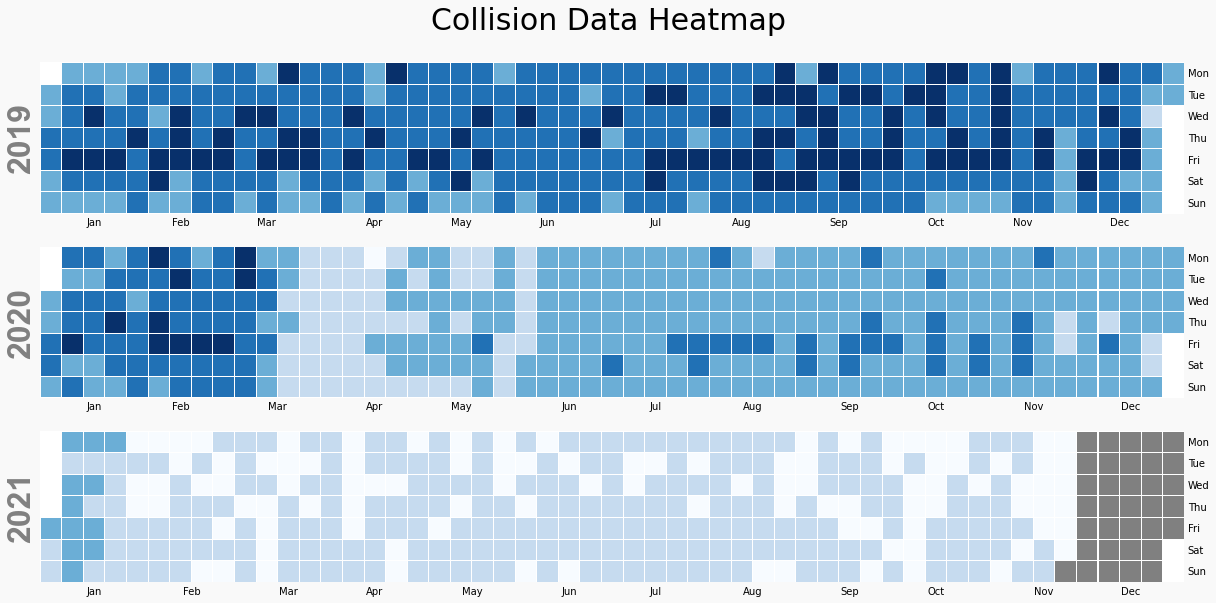

In [49]:
df1['Date Occurred'] = pd.to_datetime(df1['Date Occurred'])
df1['Year'], df1['Month'], df1['Day'] = df1['Date Occurred'].dt.year, df1['Date Occurred'].dt.month, df1['Date Occurred'].dt.day
df1['Weekday'] = df1['Date Occurred'].dt.dayofweek

years = [2019, 2020, 2021]
df1 = df1[df1['Year'].isin(years)]

collisions_1 = pd.DataFrame(df1['Date Occurred'].value_counts())

cmap = mpl.cm.get_cmap('Blues', 5)

fig, ax = calmap.calendarplot(collisions_1['Date Occurred'],
                    fillcolor='grey', linewidth=0.01,cmap=cmap,
                    fig_kws=dict(figsize=(17,8)))
fig.set_facecolor('#f9f9f9')
fig.suptitle('Collision Data Heatmap', y = 1.05, size = 30);


# Overview of Victims by Age with respect to Sex and Descent

In [50]:
dict_race = {'H':'Hispanic', 'B':'Black', 'O':'Unknown', 'W':'White', 'X':'Unknown',
             'A':'Asian', 'K':'Asian', 'C':'Asian', 'F':'Asian', 'U':'Pacific Islander',
             'J':'Asian', 'P':'Pacific Islander', 'V':'Asian', 'Z':'Asian',
             'I':'American Indian', 'G':'Pacific Islander', 'S':'Pacific Islander', 'D':'Asian', 'L':'Asian'}

df1["Victim Descent"] = df1["Victim Descent"].map(dict_race)

In [51]:
dict_gender = {
    'M':'Male', 
    'F':'Female', 
    'X':'Unknown'}
df1["Victim Sex"] = df1["Victim Sex"].map(dict_gender)

Text(0.5, 1.0, 'Distribution of Victim Age by Victim Gender')

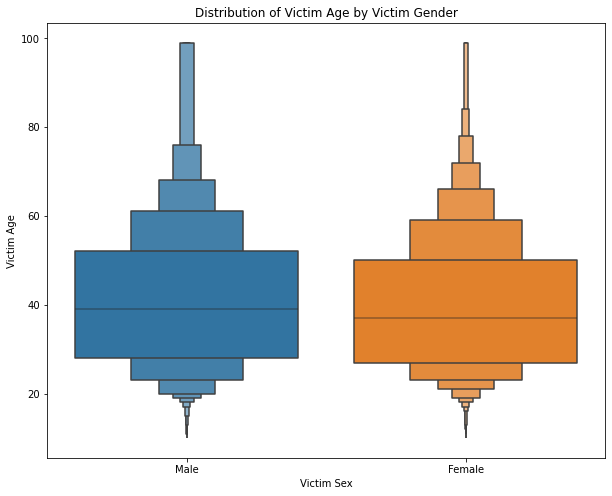

In [52]:
plt.figure(figsize=(10,8))
sns.boxenplot(x='Victim Sex', y='Victim Age', data=df1)
plt.title("Distribution of Victim Age by Victim Gender")

Text(0.5, 1.0, 'Distribution of Victim Age by Victim Descent')

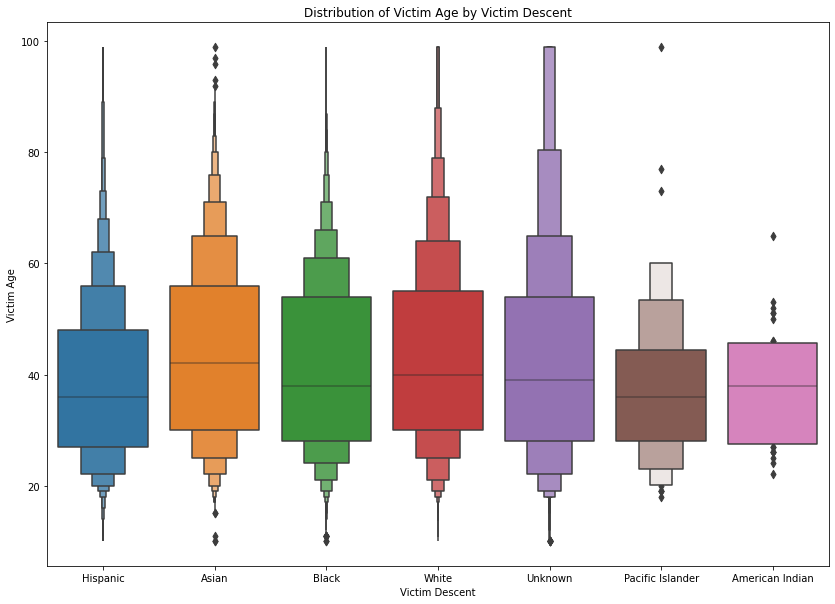

In [53]:

plt.figure(figsize=(14,10))
sns.boxenplot(x='Victim Descent', y='Victim Age', data=df1)
plt.title("Distribution of Victim Age by Victim Descent")



# Overview of Collisions with respect to the Area 

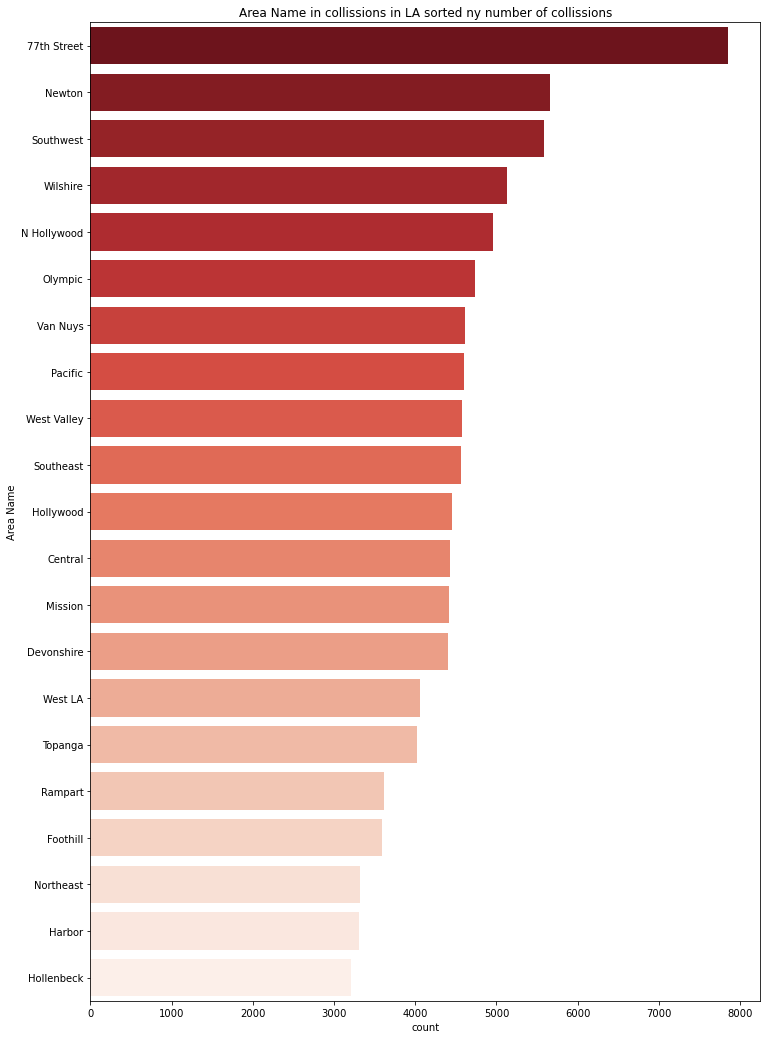

In [54]:
fig,ax = plt.subplots(figsize=(12,18))
descending_order = df1['Area Name'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df1,palette='Reds_r',y="Area Name",order=descending_order)
ax.set_title('Area Name in collissions in LA sorted ny number of collissions');

# Overview of Number of Accidents with respect to Time of Day

In [55]:
x_lin = plty.LinearScale()
y_lin = plty.LinearScale()

histogram = plty.hist(sample = df1["Time Occurred"], bins = 24, scales = {'sample': x_lin, 'count': y_lin})
histogram.colors = ["orange"]
histogram.stroke="blue"
histogram.stroke_width = 2.0

ax_x = plty.Axis(scale = x_lin, label = 'Time Occurred', label_offset = '35px', tick_format = '0.1f')
ax_y = plty.Axis(scale = y_lin, label = 'Number of Accidents', orientation = 'vertical', label_offset = '45px', tick_format = '0.1f')
fig = plty.Figure(marks = [histogram], axes = [ax_x, ax_y], legend_location = 'top', title = 'Number of Accidents by Time of day', fig_margin = dict(top=40, bottom=40, left=60, right=40))
fig.layout.width = "600px"
fig.layout.height = "400px"

fig

Figure(axes=[Axis(label='Time Occurred', label_offset='35px', scale=LinearScale(), tick_format='0.1f'), Axis(l…

# Overview of the number of traffic collision case of each area by year by month

In [56]:
# Read in the dataset with its url
df=pd.read_csv("https://raw.githubusercontent.com/zao-YQW/IS445_Final_GroupE/main/Traffic_Collision_Data_from_2010_to_Present.csv")

In [57]:
# convert the "Date Occurred" column into three columns, which are respectively year, month and day
df['Date Occurred-year'] = df['Date Occurred'].map(lambda x:x.split('/')[2])
df['Date Occurred-day'] = df['Date Occurred'].map(lambda x:x.split('/')[1])
df['Date Occurred-month'] = df['Date Occurred'].map(lambda x:x.split('/')[0])

# Groupby the dataset by 'Date Occurred-month','Date Occurred-year' and'Area ID'column
area = df.groupby(['Date Occurred-month','Date Occurred-year','Area ID']).count()
area = pd.DataFrame(area, columns=['Date Reported'])
area.columns = ['Case Number']  
area = area.unstack()

# get a new data frame 
new_df = pd.DataFrame(area)

# Extract monthly data to facilitate visualization drawing
new_df_01 = new_df.iloc[0:3].T
new_df_02 = new_df.iloc[3:6].T
new_df_03 = new_df.iloc[6:9].T
new_df_04 = new_df.iloc[9:12].T
new_df_05 = new_df.iloc[12:15].T
new_df_06 = new_df.iloc[15:18].T
new_df_07 = new_df.iloc[18:21].T
new_df_08 = new_df.iloc[21:24].T
new_df_09 = new_df.iloc[24:27].T
new_df_10 = new_df.iloc[27:30].T
new_df_11 = new_df.iloc[30:33].T
new_df_12 = new_df.iloc[33:36].T
area = []
for i in range(21):
    area.append(new_df_01.index[i][1])

new_df_01['Area ID'] = area
new_df_02['Area ID'] = area
new_df_03['Area ID'] = area
new_df_04['Area ID'] = area
new_df_05['Area ID'] = area
new_df_06['Area ID'] = area
new_df_07['Area ID'] = area
new_df_08['Area ID'] = area
new_df_09['Area ID'] = area
new_df_10['Area ID'] = area
new_df_11['Area ID'] = area
new_df_12['Area ID'] = area

In [58]:
# Create a interatcive visualization.
def plot_draw(month_set, year):
    inside = month_set[-2:]
    month = eval(month_set)
    ax = month.plot.bar(x = 'Area ID', y = (inside, year), figsize = (20,8))
    plt.xlabel('Area ID',size = 20)
    plt.ylabel('Case Number', size = 20)
    plt.title("Each Area's Traffic Collision Case by Year by Month", size = 20)
    plt.yticks(size = 20)
    plt.legend('Year')
    ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],fontsize=20,rotation=1)
    plt.show()

interact(plot_draw,
         month_set = {'Jan':'new_df_01','Feb':'new_df_02','Mar':'new_df_03','Apr':'new_df_04',
                  'May':'new_df_05','Jun':'new_df_06','Jul':'new_df_07','Aug':'new_df_08',
                  'Sep':'new_df_09','Oct':'new_df_10','Nov':'new_df_11','Dec':'new_df_12'},
         year = {'2019':'2019','2020':'2020','2021':'2021'})

interactive(children=(Dropdown(description='month_set', options={'Jan': 'new_df_01', 'Feb': 'new_df_02', 'Mar'…

<function __main__.plot_draw(month_set, year)>

#  Overview of Victim Age with respect to the Collisions from September 2019 to August 2020

In [59]:
warnings.filterwarnings("ignore")
%matplotlib widget

In [60]:
df2 = pd.read_csv("https://raw.githubusercontent.com/YisiYin/IS455-Final-Project/main/Traffic_Collision_Data_from_2010_to_Present.csv", parse_dates=["Date Reported"])
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [61]:
fig2 = plty.figure(title="Relationship between the Victim Age and the number of incidents")
df3 = df2.groupby("Victim Age")["Victim Age"].count()
scat2 = plty.bar(x = df3.index, y=df3)

plty.xlabel("Victim Age")
plty.ylabel("Number of Incidents")
scat2.tooltip = Tooltip(fields=["x", "y"], labels=["Victim Age","Number Of Incidents"])
plty.show()

In [62]:

year_months_idx = list(zip([2019,]*4 + [2020]*8,[ 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]))
year_months_names = list(zip([2019,]*4 + [2020]*8,['September', 'October', 'November', 'December', 
                                                   'January', 'February','March','April', 'May', 'June', 'July', 'August']))

month_dropdown = widgets.Dropdown(options=list(zip(year_months_names, year_months_idx)), value=year_months_idx[0])
month_dropdown

Dropdown(options=(((2019, 'September'), (2019, 9)), ((2019, 'October'), (2019, 10)), ((2019, 'November'), (201…

In [63]:
new_df = df2.groupby("Victim Age")["Victim Age"].count()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
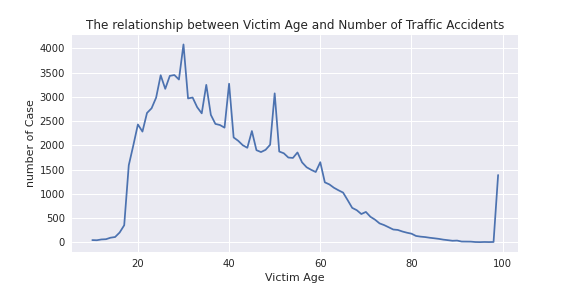

In [64]:
output = widgets.Output()

with output:
    with plt.style.context("seaborn"):
        fig = plt.figure(figsize=(8,4))

        plt.plot(new_df.index, new_df)

        plt.xlabel("Victim Age")
        plt.ylabel("number of Case")
        plt.title("The relationship between Victim Age and Number of Traffic Accidents");

In [65]:
def update_line_chart(year_month):
    dt = "%d-%d"%(year_month["new"][0], year_month["new"][1])
    temp_df = df2.set_index("Date Reported")[dt]
    with output:
        with plt.style.context("seaborn"):
            fig.clear()
            for selected in year_month["new"]:
                new_temp_df = temp_df.groupby("Victim Age")["Victim Age"].count()
                plt.plot(new_temp_df.index, new_temp_df)

            plt.xlabel("Victim Age")
            plt.ylabel("number of Case")
            plt.title("The relationship between Victim Age and Number of Traffic Accidents");
            fig.canvas.draw()

month_dropdown.observe(update_line_chart, names="value")

In [66]:
widgets.VBox([month_dropdown, output])